In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats,integrate
from scipy.optimize import minimize_scalar

In [ ]:
#자유도가 10인 카이제곱분포
n=10
rv=stats.norm() #정규분포 생성
sample_size=int(1e6)
#표본정규분포에서 표본 크기 100만으로 무작위추출
Zs_sample=rv.rvs((n,sample_size))
#axis=0에서 총합을 구하고, 표준정규분포의 제곱합 표본 데이터를 구한다.
chi2_sample=np.sum(Zs_sample**2,axis=0)

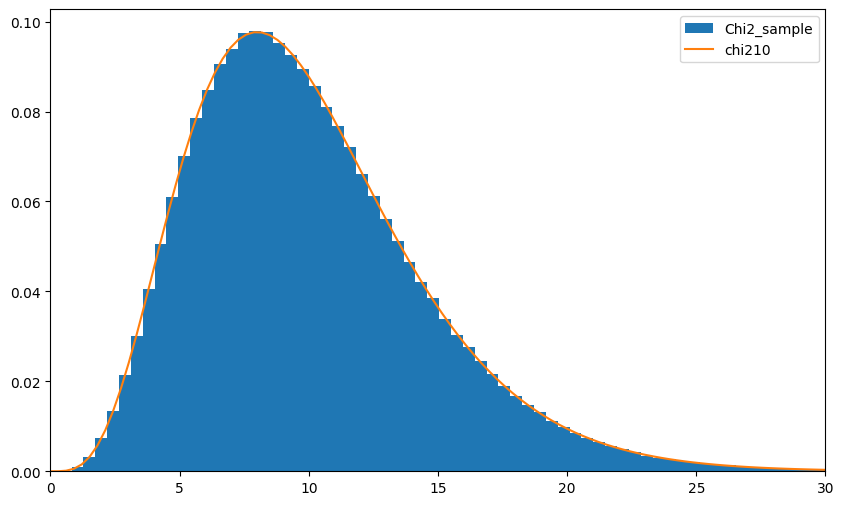

In [ ]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

rv_true=stats.chi2(n)
xs=np.linspace(0,30,100)
ax.hist(chi2_sample,bins=100,density=True,label='Chi2_sample') #무작위 추출 표본 데이터 히스토그램
ax.plot(xs,rv_true.pdf(xs),label=f'chi2{n}')

ax.legend()
ax.set_xlim(0,30)
plt.show()

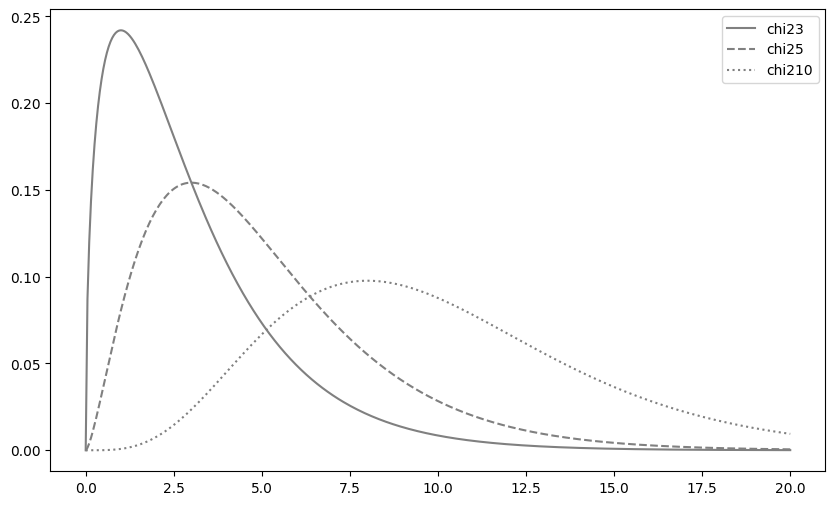

In [9]:
#자유도에 따른 데이터 분포
linestyles=['-','--',':']
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

xs=np.linspace(0,20,400)
for n, ls in zip([3,5,10],linestyles):
    rv=stats.chi2(n)
    ax.plot(xs,rv.pdf(xs),label=f'chi2{n}',ls=ls,color='gray')

ax.legend()
plt.show()

In [13]:
stats.chi2(10).isf(0.05)

np.float64(18.307038053275146)

In [ ]:
#t-분포 데이터 생성
n=10
rv1=stats.norm()
rv2=stats.chi2(n)
#rvs() 무작위 표본 생성
sample_size=int(1e6)
Z_sample=rv1.rvs(sample_size)
chi2_sample = rv2.rvs(sample_size)

t_sample=Z_sample/np.sqrt(chi2_sample/n)
t_sample

array([ 0.61972505, -0.50055916,  0.33579154, ...,  3.27648558,
       -0.65556968, -0.80624432], shape=(1000000,))

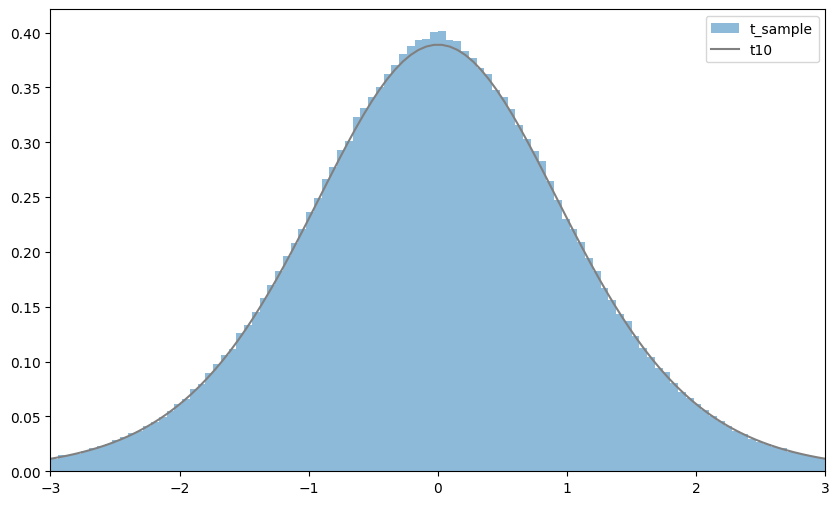

In [17]:
#자유도가 10인 t(10) 밀도함수
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

rv=stats.t(n)
xs=np.linspace(-3,3,100)
ax.hist(t_sample, bins=100, range=(-3,3),
density=True,alpha=0.5,label='t_sample')
ax.plot(xs,rv.pdf(xs),label=f't{n}',color='gray')

ax.legend()
ax.set_xlim(-3,3)
plt.show()

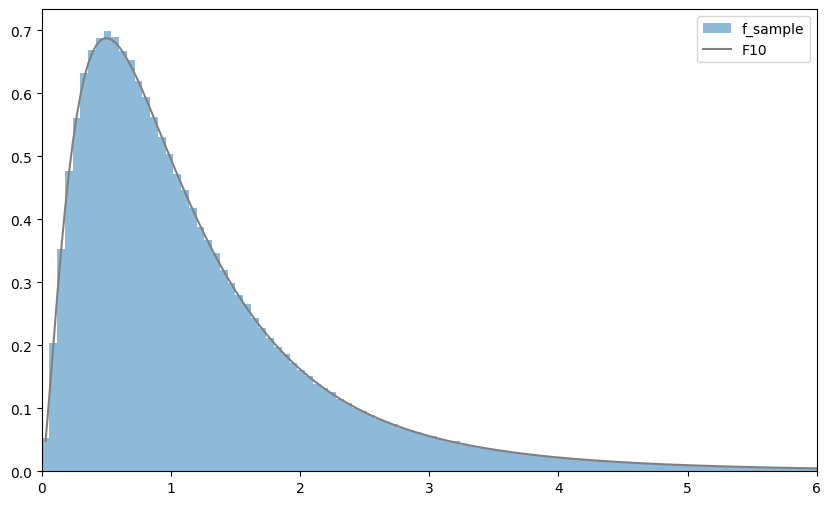

In [19]:
n1=5
n2=10
rv1=stats.chi2(n1)
rv2=stats.chi2(n2)

sample_size = int(1e6)
sample1=rv1.rvs(sample_size)
sample2=rv2.rvs(sample_size)

f_sample=(sample1/n1)/(sample2/n2)
#자유도가 10인 t(10) 밀도함수
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

rv=stats.f(n1,n2)
xs=np.linspace(0,6,200)[1:]
ax.hist(f_sample, bins=100, range=(0,6),
density=True,alpha=0.5,label='f_sample')
ax.plot(xs,rv.pdf(xs),label=f'F{n}',color='gray')

ax.legend()
ax.set_xlim(0,6)
plt.show()